Prediction of music genre 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import mean_squared_error


import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

2023-03-05 14:54:19.676624: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
data = pd.read_csv('music_genre.csv')
data

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


<AxesSubplot:>

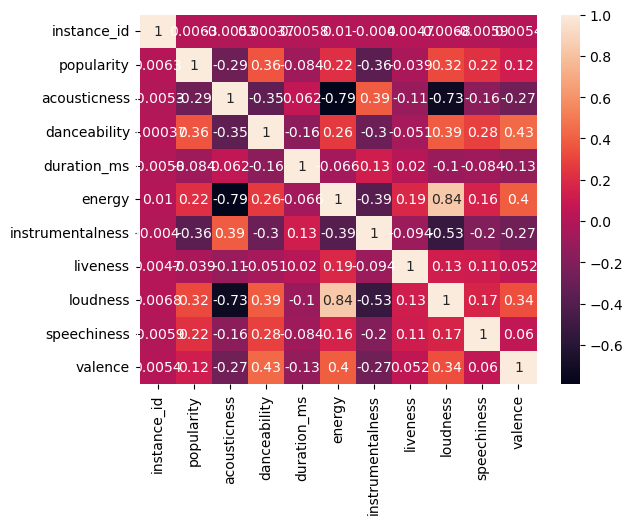

In [26]:
plt.plot(figsize=(30,30))
sns.heatmap(data.corr(),annot=True)

In [27]:
data.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')

In [28]:
data.dtypes

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

In [29]:
data['music_genre'].value_counts()

Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64

In [30]:
data.isna().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [12]:


music.drop([10000, 10001, 10002, 10003, 10004], inplace = True)



In [31]:
columns = ['key','mode','tempo']
for column in columns:
    print(data[column].unique())

['A#' 'D' 'G#' 'C#' 'F#' 'B' 'G' 'F' 'A' 'C' 'E' 'D#' nan]
['Minor' 'Major' nan]
['100.889' '115.00200000000001' '127.994' ... '112.97' '167.655'
 '99.20100000000001']


In [32]:
data = data.dropna(axis=0)
data

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [33]:
def preprocess_inputs(df):
    df = df.copy()
    
    df = df.drop(['instance_id','artist_name','track_name','obtained_date'],axis=1)

    df['mode'] = df['mode'].replace({'Minor' : 0,
                                     'Major' : 1})

    embarked_dummies = pd.get_dummies(df.key)
    df = pd.concat([df, embarked_dummies], axis=1)
    df = df.drop('key',axis=1)
    
    df['tempo'] = df['tempo'].replace('?',np.nan)
    df["tempo"] = df["tempo"].astype("float")
    df['tempo'] = df['tempo'].fillna(df['tempo'].mean())
     
    df['music_genre'] = df['music_genre'].replace({'Electronic':0, 'Anime':1, 'Jazz':2, 'Alternative':3, 'Country':4, 'Rap':5,
                                                   'Blues':5, 'Rock':6, 'Classical':7, 'Hip-Hop':8})    
    
    y = df['music_genre']
    X = df.drop('music_genre',axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, shuffle=True, random_state=43)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return X_train, X_test, y_train, y_test


In [34]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

X_train

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,B,C,C#,D,D#,E,F,F#,G,G#
35722,0.695409,-0.894969,-1.330786,0.254421,0.685307,-0.560018,-0.614382,0.913892,0.750605,-0.599752,...,-0.287319,-0.352074,-0.347186,-0.343350,-0.183405,-0.285216,3.241233,-0.256147,-0.357942,-0.269321
47351,0.438074,-0.490244,-0.728482,-0.586751,-0.278936,-0.559793,2.523664,0.182083,-1.332259,1.097496,...,-0.287319,-0.352074,-0.347186,-0.343350,-0.183405,-0.285216,-0.308525,-0.256147,-0.357942,-0.269321
31954,-0.591269,-0.175101,-0.377138,0.078435,0.417881,-0.500760,-0.394298,0.344922,-1.332259,-0.374899,...,-0.287319,-0.352074,-0.347186,-0.343350,-0.183405,-0.285216,-0.308525,-0.256147,-0.357942,-0.269321
24452,-0.205266,-0.871917,0.225166,-1.743968,0.323716,-0.557196,-0.524123,0.344922,0.750605,-0.332492,...,3.480449,-0.352074,-0.347186,-0.343350,-0.183405,-0.285216,-0.308525,-0.256147,-0.357942,-0.269321
21511,0.502408,-0.154675,0.894392,-0.094295,0.014857,-0.515190,1.707624,0.114368,0.750605,-0.611586,...,-0.287319,-0.352074,-0.347186,-0.343350,-0.183405,-0.285216,-0.308525,-0.256147,2.793749,-0.269321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25238,2.046422,-0.852950,-1.057518,-0.054265,0.741806,-0.560018,-0.768935,0.683821,-1.332259,-0.112570,...,-0.287319,-0.352074,2.880304,-0.343350,-0.183405,-0.285216,-0.308525,-0.256147,-0.357942,-0.269321
18453,0.052070,-0.428966,-1.358670,0.691708,-0.034108,-0.560018,-0.631692,0.265115,0.750605,-0.590876,...,-0.287319,2.840309,-0.347186,-0.343350,-0.183405,-0.285216,-0.308525,-0.256147,-0.357942,-0.269321
40758,-0.848605,1.934608,-0.895789,2.283691,-1.759199,2.261665,-0.722569,-1.000839,-1.332259,-0.546497,...,-0.287319,-0.352074,-0.347186,2.912477,-0.183405,-0.285216,-0.308525,-0.256147,-0.357942,-0.269321
19781,0.245072,-0.866957,1.647272,-1.743968,-0.395699,-0.557304,0.069361,-0.281606,-1.332259,1.058048,...,-0.287319,-0.352074,-0.347186,-0.343350,-0.183405,-0.285216,-0.308525,-0.256147,-0.357942,-0.269321


In [35]:



models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                    Bagging Classifier": BaggingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")





                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                    Bagging Classifier trained.


In [36]:


for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))


                   Logistic Regression: 47.99%
                   K-Nearest Neighbors: 44.29%
                         Decision Tree: 43.56%
Support Vector Machine (Linear Kernel): 47.09%
   Support Vector Machine (RBF Kernel): 54.69%
                        Neural Network: 57.33%
                         Random Forest: 54.53%
                     Gradient Boosting: 58.13%
                    Bagging Classifier: 51.61%
